In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

In [48]:
## Define a dataset
mean_01 = np.array([1.0, 0.5])
cov_01 = np.array([[1.0,0.1],[0.1,1.2]])

mean_02 = np.array([7.3,6.5])
cov_02 = np.array([[1.0,0.1],[0.1,1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


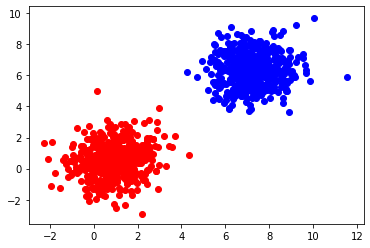

In [49]:
plt.scatter(dist_01[:,0],dist_01[:,1], color='red')
plt.scatter(dist_02[:,0],dist_02[:,1], color='blue')

plt.show()

In [50]:
## Input data :- (dist_01.shape[0]+dist_02.shape[0], #num_features)
data = np.concatenate((dist_01, dist_02))
print(data.shape)

# print(data.min(), data.max())

(1000, 2)


In [51]:
from pprint import pprint

In [52]:
# k = 4

# clusters = {}

# colors = ["blue","red","yellow","green"]

# for i in range(k):
#     params = {
#         "center" : np.random.uniform(low=data.min(), high = data.max(), size = (data.shape[1])),
#         "history" : [],
#         "points" : [],
#     }
    
#     clusters[i] = params

# pprint(clusters)

In [60]:
## KMeans Clustering -> Parameter Definition
K = 4 ## Number of clusters
clusters = {}
for cx in range(K):
    params = {
        'centroid': np.random.uniform(low=data.min(), high=data.max(),size=(data.shape[1])),
        'history': [], # history of the centroid locations
        'points' : [], # points in the cluster -> for centroid recalculation
    }
    clusters[cx] = params
pprint(clusters)


colors = ['yellow','red','blue','green']

{0: {'centroid': array([6.82748485, 7.39844494]), 'history': [], 'points': []},
 1: {'centroid': array([5.99707567, 9.60693126]), 'history': [], 'points': []},
 2: {'centroid': array([5.89840952, 6.06004933]), 'history': [], 'points': []},
 3: {'centroid': array([8.01374113, 2.5545601 ]), 'history': [], 'points': []}}


In [34]:
# print(len(clusters[0]['history']))

In [35]:
# clusters[0]['centroid'] = np.array([15,2])
# pprint(clusters)

In [39]:
# def distance(p1,p2):
#     return np.sqrt(((p1-p2)**2).sum())

In [58]:
## Defining a Distance function
def distance(p1, p2):
    '''Euclidian Distance'''
    return np.sqrt(((p1-p2)**2).sum())

distance(np.array([0.0,0.0]),np.array([1.0,1.0]))

1.4142135623730951

In [54]:
plt.scatter?

In [42]:
# n = 10
# for i in range(n):
#     plt.figure(i)
    
#     for j in range(data.shape[0]):
#         d = []
#         for c in range(k):
#             dist = distance(data[j],clusters[c]["centroid"])
#             d.append(dist)
            
#         d = np.asarray(d)
#         cluster_id = np.argmin(d)
        
#         plt.scatter(data[j,0], data[j,1], colors = colors[cluster_id])

#         clusters[cluster_id]["points"].append(data[j])
        
#     for cx in range(K):
#         plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], color='black')
        
#     for c in range(k):
#         clusters[c]["history"].append(clusters[c]["centroid"])
        
#         if len(clusters[c]["points"]) != 0:
#             new_val = np.array(clusters[c]["points"].mean(axis=0))
            
#             clusters[c]["centroid"] = new_val
            
#         clusters[c]["points"] = []

#     plt.show()

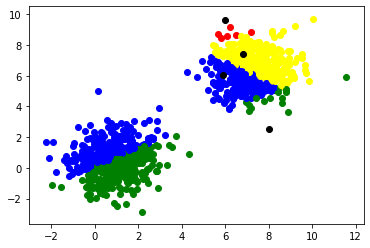

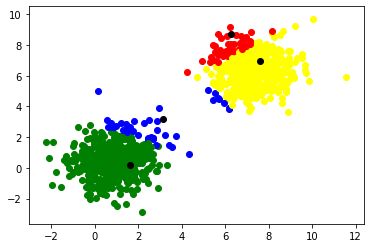

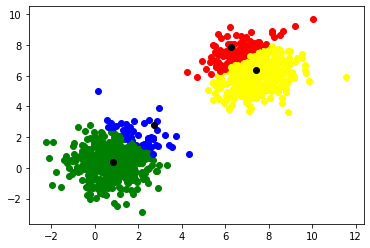

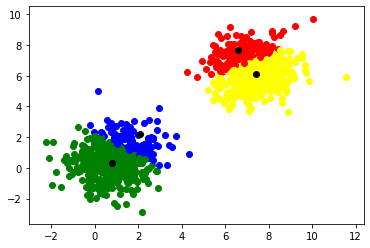

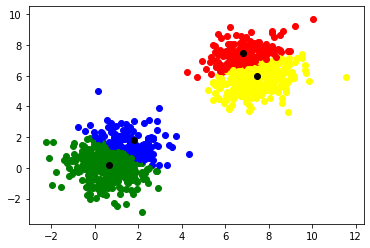

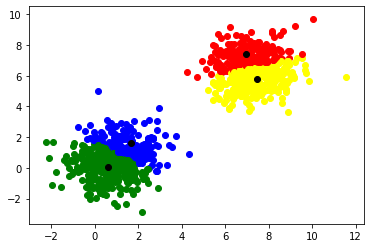

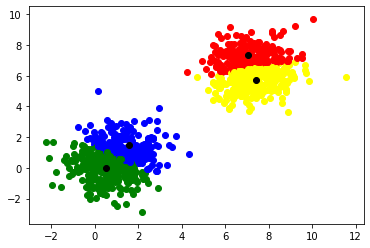

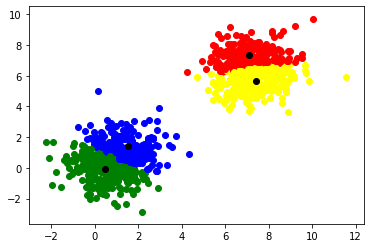

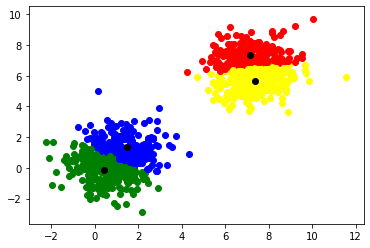

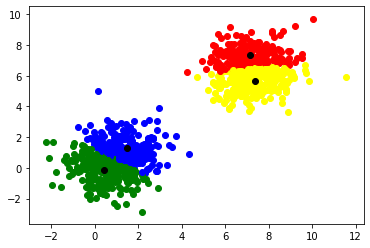

[array([5.99707567, 9.60693126]), array([6.25339363, 8.73240661]), array([6.25304904, 7.8449384 ]), array([6.60079868, 7.64860765]), array([6.84061713, 7.49555054]), array([6.96096531, 7.39405275]), array([7.04161217, 7.34312022]), array([7.1039338 , 7.32435405]), array([7.1396981 , 7.32478959]), array([7.15524545, 7.33080703])]


In [61]:
## Execution logic
n_steps = 10
for ix in range(n_steps):
    plt.figure(ix)
    # Step 1. -> Assign points to clusters
    for ix in range(data.shape[0]):
        d = []
        for cx in range(K):
            dist = distance(data[ix], clusters[cx]['centroid'])
            d.append(dist)
        d = np.asarray(d)
        c_id = np.argmin(d) ## Cluster ID for the particular point

        plt.scatter(data[ix,0], data[ix, 1], color=colors[c_id])

        clusters[c_id]['points'].append(data[ix])

    for cx in range(K):
        plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], color='black')

    # Step 2. -> Update the centroid
    for cx in range(K):
        clusters[cx]['history'].append(clusters[cx]['centroid'])

        if len(clusters[cx]['points']) !=0:
            new_val = np.array(clusters[cx]['points']).mean(axis=0)

            clusters[cx]['centroid'] = new_val # updated centroid location


        ## Step 3. Remove points from the cluster
        clusters[cx]['points'] = []   

    plt.show()
print(clusters[1]['history'])

In [ ]:
plt.figure(0)
for cx in range(K):
    hist_d = []
    for pt in range(1, len(clusters[cx]['history'])):
        hist_d.append(distance(clusters[cx]['history'][pt], clusters[cx]['history'][pt-1]))
    plt.plot(hist_d, color=colors[cx])
plt.show()

# Moons Dataset

In [63]:
from sklearn.datasets import make_moons, make_circles

In [64]:
X,Y = make_moons(n_samples = 500, noise = 0.1)

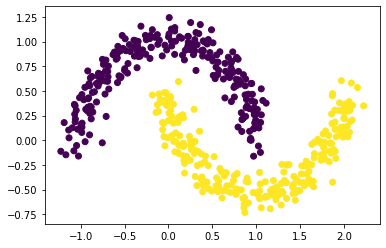

In [65]:
plt.scatter(X[:,0],X[:,1],c=Y)